In [1]:
# Standard Python modules
import os, sys
import numpy as np
import pandas as pd
import xarray as xr

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.projections import get_projection_class

sys.path.append('../modules')
from timeseries import select_months

In [2]:
path_to_data = '/expanse/nfs/cw3e/cwp140/'
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
ssn = 'all'
## read csv
fname = path_to_out + 'box_whisker_2000-2019.csv'
df1 = pd.read_csv(fname)

fname = path_to_out + 'box_whisker_2020-2024.csv'
df2 = pd.read_csv(fname)

df = pd.concat([df1, df2])
df['IVT'] = df['IVT']*100
df['Z0'] = df['Z0']*100
df['UV'] = df['UV']*100

df = df.set_index(pd.to_datetime(df['impact_date']))
if ssn == 'DJF':
    df = select_months(df, 12, 2)
elif ssn == 'cool-season':
    df = select_months(df, 9, 2)
else:
    df = df
df


,impact_date,init_date,F,model_name,IVT,Z0,UV
impact_date,,,,,,,
2018-10-09,2018-10-09,20181008,24,GEFSv12_reforecast,0.0,91.0,96.0
2018-10-09,2018-10-09,20181007,48,GEFSv12_reforecast,0.0,91.0,93.0
2018-10-09,2018-10-09,20181006,72,GEFSv12_reforecast,0.0,75.0,94.0
2018-10-09,2018-10-09,20181005,96,GEFSv12_reforecast,0.0,91.0,93.0
2018-10-09,2018-10-09,20181004,120,GEFSv12_reforecast,0.0,94.0,75.0
...,...,...,...,...,...,...,...
2024-02-01,2024-02-01,20240129,72,GEFS_archive,96.0,75.0,97.0
2024-02-01,2024-02-01,20240128,96,GEFS_archive,95.0,75.0,95.0
2024-02-01,2024-02-01,20240127,120,GEFS_archive,90.0,0.0,90.0


In [7]:
idx = (df.F == 48)
tmp = df.loc[idx]
tmp.Z0.describe()

count    91.000000
mean     44.230769
std      43.613473
min       0.000000
25%       0.000000
50%      75.000000
75%      90.500000
max      99.000000
Name: Z0, dtype: float64

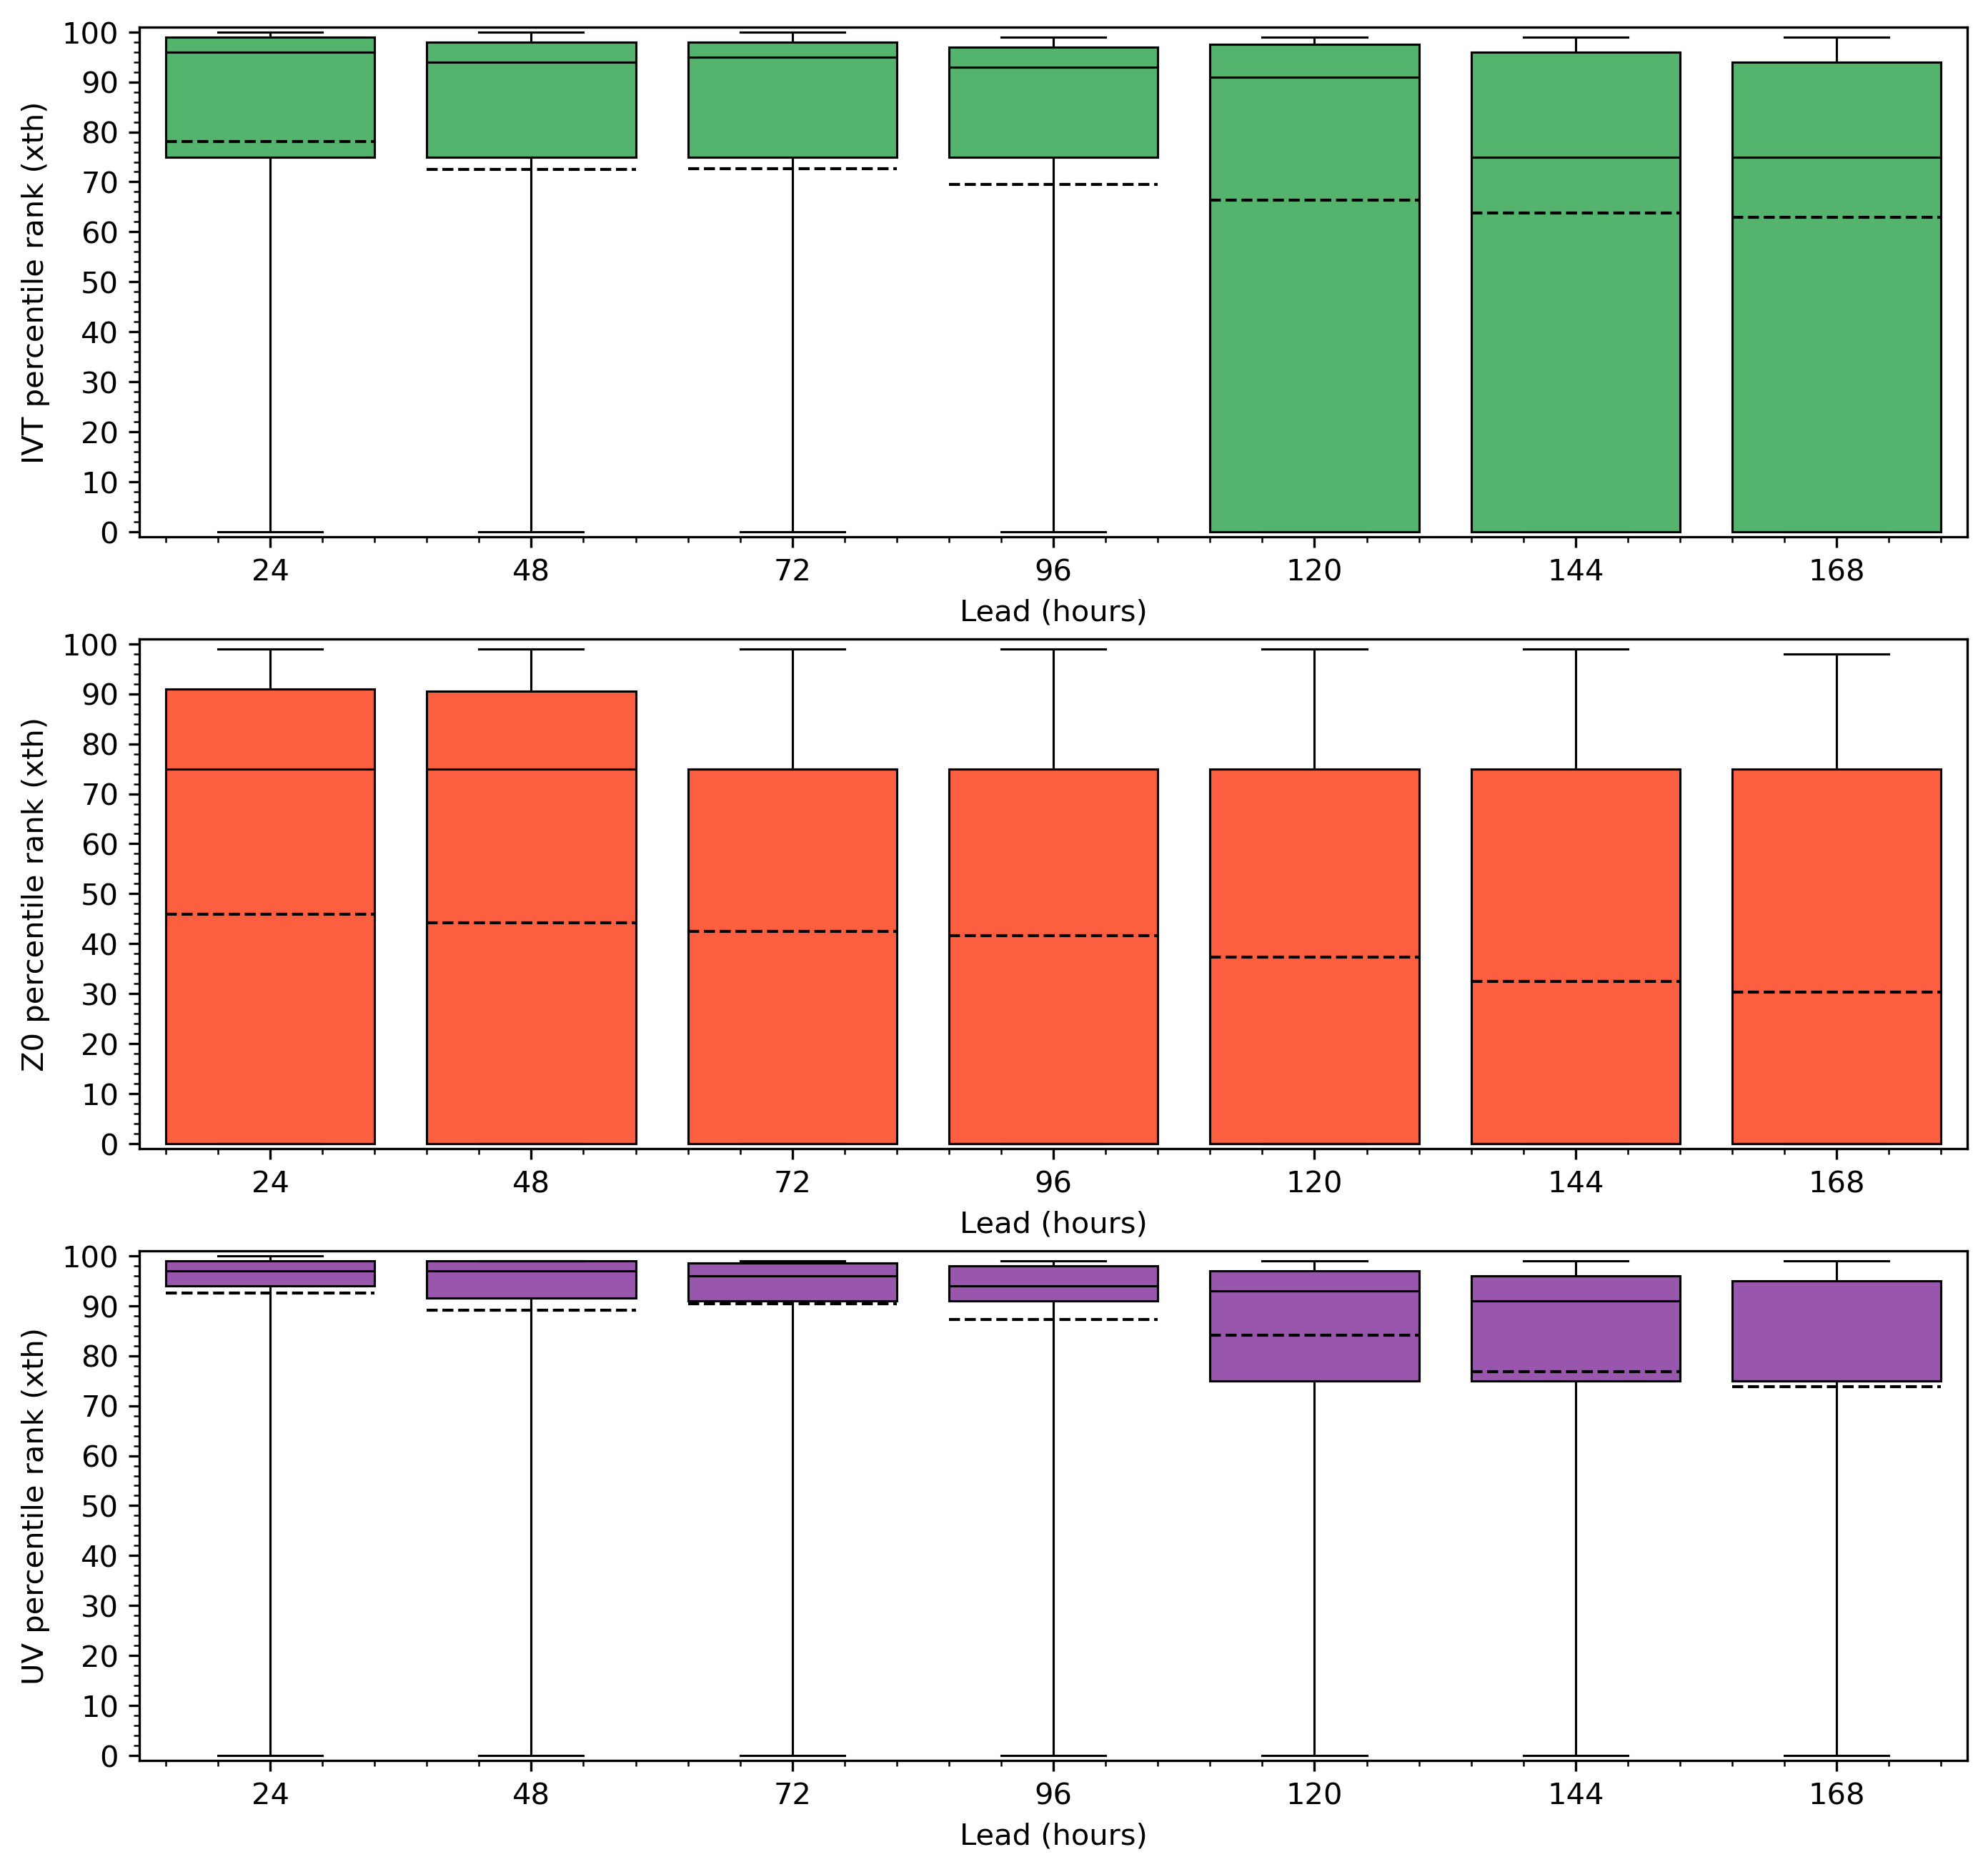

In [5]:
# Create figure
fig = plt.figure(figsize=(11, 10.5))
fig.dpi = 300
fname = path_to_figs + 'box_whisker_{0}'.format(ssn)
fmt = 'png'

nrows = 3
ncols = 1

## Use gridspec to set up a plot with a series of subplots that is
## n-rows by n-columns
gs = GridSpec(nrows, ncols, height_ratios=[1, 1, 1], width_ratios = [1], wspace=0.2, hspace=0.2)
## use gs[rows index, columns index] to access grids

#######################
### BOX AND WHISKER ###
#######################
varname_lst = ['IVT', 'Z0', 'UV']
color_lst = ['#54B36D', '#FC5F3F', '#9956AD']
for i, varname in enumerate(varname_lst):
    ax = fig.add_subplot(gs[i, 0])
    PROPS = {'boxprops':{'facecolor':color_lst[i], 'edgecolor':'k'},
             'medianprops':{"color": "k"},
             'whiskerprops':{"color": "k"},
             'capprops':{"color": "k"},
             'flierprops':{"marker": "x"},
             'meanprops':{'c':'k', 'lw':1},
             'bootstrap': 5000}
    
    bplot = sns.boxplot(y=varname, x="F", data=df, 
                        whis=[0, 100],
                    order=np.arange(24, 8*24, 24),
                    meanline=True, showmeans=True, 
                    notch=False, showcaps=True,
                    linewidth=0.75,
                    **PROPS)
    
    #  set the ticks first 
    bplot.set_yticks(np.arange(0., 101, 10))
    ax.minorticks_on()
    ax.tick_params(axis='y', which='minor', bottom=True)
    ax.tick_params(axis='y', which='major')
        
    plt.ylim(-1., 101)
        
    # ax.set_title('(a)', loc='left')
    # ax.annotate(plt_lbl[i], (5, 207), xycoords='axes points', fontsize=12.,
    #         backgroundcolor='white', zorder=100)
    
    ax.set_ylabel('{0} percentile rank (xth)'.format(varname))
    ax.set_xlabel('Lead (hours)')


fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=True)

# Show
plt.show()

In [6]:
# Thus, if we have this weird "flipped" appearance in the notched box plots,
# it simply means that the 1st quartile has a lower value than the confidence of the mean and 
# vice versa for the 3rd quartile. 
# Although it looks ugly, it's actually useful information about the (un)confidence of the median.